In [ ]:
# Install dependencies
!pip install bertopic sentence-transformers

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

*A quick preprocessing of scraped tweets*

In [ ]:
# Load Final_tweets.csv
df = pd.read_csv('Final_tweets.csv')

# Drop Tweet ID column
df.drop(columns=['Tweet ID'], inplace=True)

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Remove duplicate tweets based on text content
df.drop_duplicates(subset='Text', inplace=True)

# Function to clean tweet text
def clean_tweet(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove hashtags symbols (keep the word)
    text = re.sub(r'#', '', text)
    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning function to text column
df['Cleaned_Text'] = df['Text'].apply(clean_tweet)

# Save cleaned dataset (optional)
df.to_csv('Cleaned_tweets.csv', index=False)

# Display first 5 rows
df.head()



6501


,Timestamp,Text,Cleaned_Text
0,2025-03-09 03:48:50+00:00,@Bricakapple @Pirat_Nation Combine that with m...,combine that with mass layoffs and security cl...
1,2025-03-09 03:48:39+00:00,"26 down, 4 more to go. Championship Weekend in...",26 down 4 more to go championship weekend in s...
2,2025-03-09 03:46:38+00:00,"Dear @elonmusk,\n\nYou have to fix your Japan ...",dear you have to fix your japan operation head...
3,2025-03-09 03:45:26+00:00,@StephanieGailW There's a really interesting b...,theres a really interesting book called the un...
4,2025-03-09 03:43:37+00:00,Hey @elonmusk The Japanese people are also fa...,hey the japanese people are also facing attemp...



*Manually removed some spam tweets*

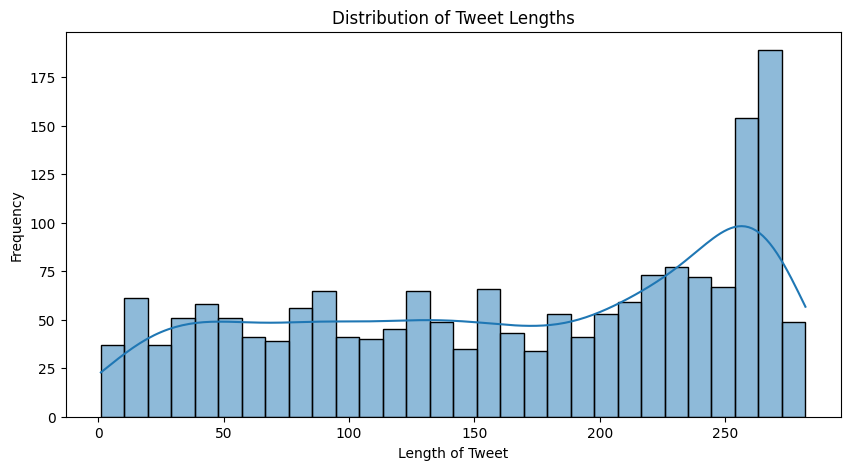

In [ ]:
# Load Final_tweets.csv
df = pd.read_csv('/content/Cleaned_tweets.csv')
df = df.dropna(subset=['Cleaned_Text'])

df['Tweet_Length'] = df['Cleaned_Text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df['Tweet_Length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.show()


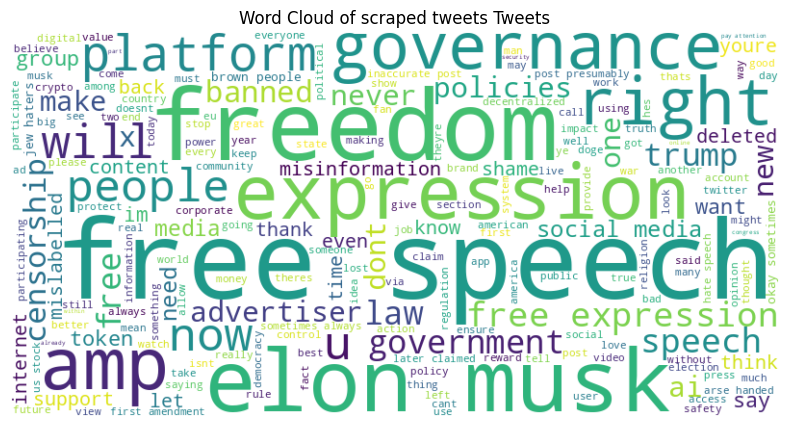

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of scraped tweets Tweets")
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


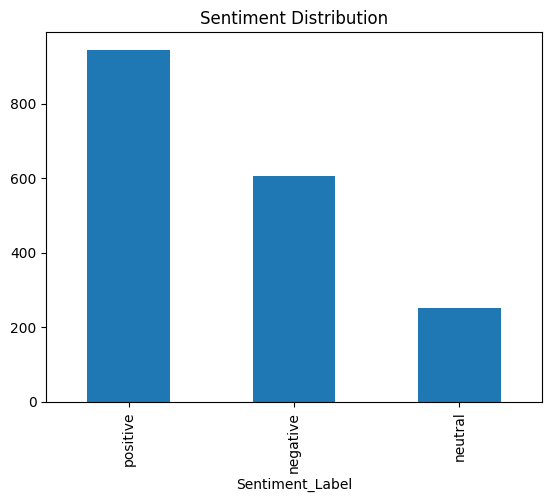

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Cleaned_Text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')
df['Sentiment_Label'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


*DATA LOADING*

In [ ]:
# Define column names based on standard Twitter datasets
twitter_columns = ['sentiment', 'tweet_id', 'date', 'query', 'user', 'text']

# Load Twitter dataset
twitter_df = pd.read_csv(
    '/content/training.1600000.processed.noemoticon.csv',
    encoding='latin-1',
    names=twitter_columns
)

# Display first 5 rows
twitter_df.head()


,sentiment,tweet_id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Load X dataset
x_df = pd.read_parquet("/content/train-DataEntity_chunk_0 (1).parquet")
x_df.head()


,text,label,tweet_hashtags,datetime,username_encoded,url_encoded
0,"$TAO Guys, Don't miss the Target price for ne...",#tao,[#TAO],2025-01-19,Z0FBQUFBQm50Zk5zaElSY0NpN2Y2UklVNW5kTVM4NlJENW...,Z0FBQUFBQm50Zk5zSDlSa0VlcDdzY1VQN2dfZURDMWp2Rz...
1,"Yeah agreed $TAO will go over $3,000 a coin \...",#tao,"[#TAO, #HOTKEY]",2025-01-19,Z0FBQUFBQm50Zk5zT3hLWnlUTWt6RkFJRmIyb3lQbDdqdH...,Z0FBQUFBQm50Zk5zV0hmU2szLUxETk9sVEtBdmx1aGx3OU...
2,$TAO showing how it’s done👁️,#tao,[#TAO],2025-01-19,Z0FBQUFBQm50Zk5zVEJQUWJ2VVJKUFhBQl9YdXliaENuUz...,Z0FBQUFBQm50Zk5zWl92NWhrUEdBZEQ1am4xVlYydVBQdT...
3,Bittensor's subnet architecture isn't just fas...,#tao,[#TAO],2025-01-19,Z0FBQUFBQm50Zk5zcFEzdmU4cnFVVVRMQ0xSS3B1Uy1nMn...,Z0FBQUFBQm50Zk5zQklvcF9KTEZFZWtRWHBVZ04wQVhPaj...
4,$TAO making moves,#tao,[#TAO],2025-01-19,Z0FBQUFBQm50Zk5zSXdPYW9OakhfNmdnTnFkUW1EUkFaM3...,Z0FBQUFBQm50Zk5zMk1ubHYxZFk3WEZKbUF0US1JeXB2RT...


In [ ]:
# Check data shape and column names
print("Twitter dataset shape:", twitter_df.shape)
print("Twitter dataset columns:", twitter_df.columns.tolist())

print("X dataset shape:", x_df.shape)
print("X dataset columns:", x_df.columns.tolist())

# Check missing values
print("\nTwitter missing values:\n", twitter_df.isnull().sum())
print("\nX dataset missing values:\n", x_df.isnull().sum())


Twitter dataset shape: (1600000, 6)
Twitter dataset columns: ['sentiment', 'tweet_id', 'date', 'query', 'user', 'text']
X dataset shape: (39075, 6)
X dataset columns: ['text', 'label', 'tweet_hashtags', 'datetime', 'username_encoded', 'url_encoded']

Twitter missing values:
 sentiment    0
tweet_id     0
date         0
query        0
user         0
text         0
dtype: int64

X dataset missing values:
 text                0
label               0
tweet_hashtags      0
datetime            0
username_encoded    0
url_encoded         0
dtype: int64


In [ ]:
# Drop irrelevant columns
columns_to_drop = ['label', 'tweet_hashtags', 'username_encoded', 'url_encoded']
x_df.drop(columns=[col for col in columns_to_drop if col in x_df.columns], inplace=True)

In [ ]:
# Drop duplicate tweets
x_df.drop_duplicates(subset='text', inplace=True)

In [15]:
import re
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Preprocessing function:
def preprocess_text(text):

    # Remove 'TAO' case-insensitively
    text = re.sub(r'\bTAO\b', '', text, flags=re.IGNORECASE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove hashtag symbols
    text = re.sub(r'#', '', text)
    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Lowercase text
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r"[^a-z\s]", "", text)

    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Lemmatization
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words("english")
    tokens = [token for token in tokens if token not in stopwords]
    return " ".join(tokens)

# Select the last 300000 rows
twitter_df = twitter_df.iloc[-300000:]
print(twitter_df.shape)

# Preprocessing Twitter dataset
twitter_df['cleaned_text'] = twitter_df['text'].apply(preprocess_text)


# Preprocessing X dataset
x_df['cleaned_text'] = x_df['text'].apply(preprocess_text)

# Verify the cleaning
print(twitter_df[['text', 'cleaned_text']].head())
print(x_df[['text', 'cleaned_text']].head())


(300000, 6)
                                                      text  \
1300000  Not as much as her chicken curry - I tell you ...   
1300001  Gareth, chelsi and evie are having dinner outs...   
1300002  @Transtextuel Thanks!  I added you to my Delic...   
1300003  @thehannabeth Wash it down wit baking soda mix...   
1300004  @TaliaRusso There's also a cruise email. Those...   

                                              cleaned_text  
1300000                            much chicken curry tell  
1300001  gareth chelsi evie dinner outside rose garden ...  
1300002                     thanks added delicious network  
1300003  wash wit baking soda mixed warm water work eve...  
1300004  also cruise email pic better quality like one ...  
                                                text  \
0  $TAO Guys, Don't miss the Target price  for ne...   
1  Yeah  agreed $TAO will go over $3,000 a coin \...   
2                       $TAO showing how it’s done👁️   
3  Bittensor's subnet arc

In [ ]:
twitter_df.head()

,sentiment,tweet_id,date,query,user,text,cleaned_text,Tweet_Length
1300000,4,2006481065,Tue Jun 02 11:13:52 PDT 2009,NO_QUERY,blackcouncil,Not as much as her chicken curry - I tell you ...,much chicken curry tell,23
1300001,4,2006481076,Tue Jun 02 11:13:52 PDT 2009,NO_QUERY,Pokershark,"Gareth, chelsi and evie are having dinner outs...",gareth chelsi evie dinner outside rose garden ...,60
1300002,4,2006481093,Tue Jun 02 11:13:52 PDT 2009,NO_QUERY,ilarytranslates,@Transtextuel Thanks! I added you to my Delic...,thanks added delicious network,30
1300003,4,2006481099,Tue Jun 02 11:13:52 PDT 2009,NO_QUERY,MissShellBell89,@thehannabeth Wash it down wit baking soda mix...,wash wit baking soda mixed warm water work eve...,52
1300004,4,2006481118,Tue Jun 02 11:13:52 PDT 2009,NO_QUERY,Bayachaya,@TaliaRusso There's also a cruise email. Those...,also cruise email pic better quality like one ...,53


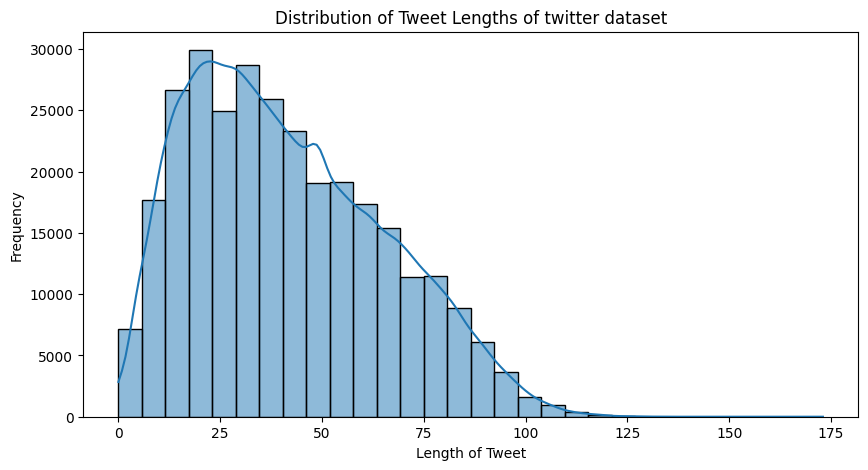

In [ ]:
twitter_df['Tweet_Length'] = twitter_df['cleaned_text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(twitter_df['Tweet_Length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths of twitter dataset")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.show()


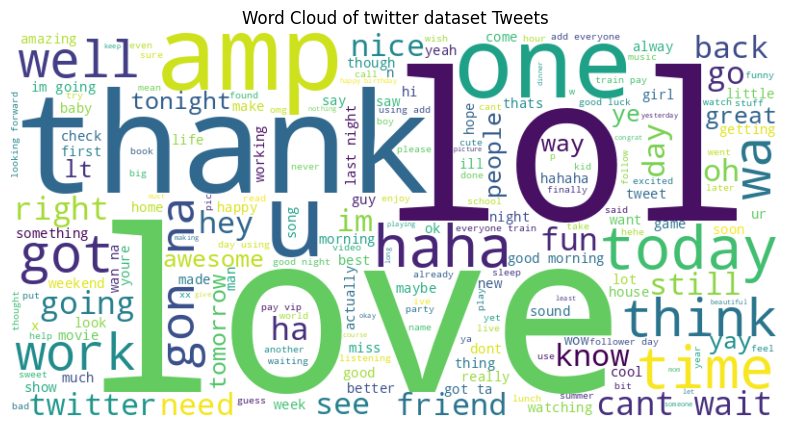

In [ ]:
from wordcloud import WordCloud

text = ' '.join(twitter_df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of twitter dataset Tweets")
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


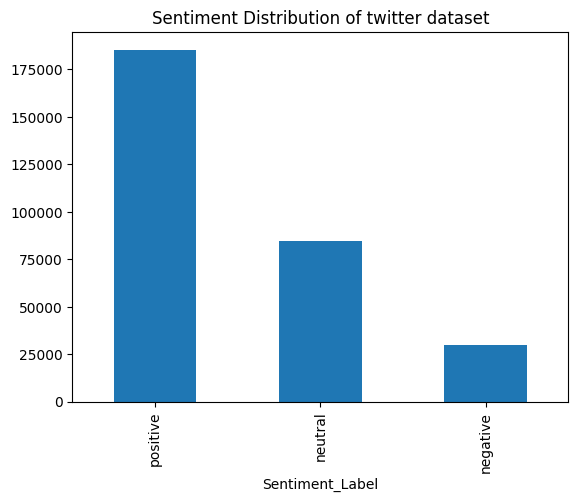

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
twitter_df['Sentiment_Score'] = twitter_df['cleaned_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
twitter_df['Sentiment_Label'] = twitter_df['Sentiment_Score'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')
twitter_df['Sentiment_Label'].value_counts().plot(kind='bar', title='Sentiment Distribution of twitter dataset')
plt.show()


*Merging scraped data and collected data of X*

In [ ]:
# Load cleaned dataset
df = pd.read_csv("Cleaned_tweets.csv")

# Standardize column names
df.rename(columns={"Timestamp": "datetime", "Cleaned_Text": "cleaned_text"}, inplace=True)
x_df.rename(columns={"text": "Text"}, inplace=True)

# Select only datetime and cleaned_text
df1_final = df[["datetime", "cleaned_text"]]
df2_final = x_df[["datetime", "cleaned_text"]]

# Concatenate both
merged_df = pd.concat([df1_final, df2_final], ignore_index=True)

# drop rows with empty cleaned_text just in case
merged_df.dropna(subset=["cleaned_text"], inplace=True)
merged_df = merged_df[merged_df["cleaned_text"].str.strip() != ""]

# Save merged dataset
merged_df.to_csv("Final_Merged_Tweets.csv", index=False)

# Preview
merged_df.head()


,datetime,cleaned_text
0,2025-03-09 03:48:50+00:00,combine that with mass layoffs and security cl...
1,2025-03-09 03:48:39+00:00,26 down 4 more to go championship weekend in s...
2,2025-03-09 03:46:38+00:00,dear you have to fix your japan operation head...
3,2025-03-09 03:45:26+00:00,theres a really interesting book called the un...
4,2025-03-09 03:43:37+00:00,hey the japanese people are also facing attemp...


*Prprocessing the combined dataset to makesure everything is perfectly cleaned*

In [ ]:
merged_df['Cleaned_Text'] = merged_df['cleaned_text'].apply(preprocess_text)

In [ ]:
merged_df.head()

,datetime,cleaned_text,Cleaned_Text
0,2025-03-09 03:48:50+00:00,combine that with mass layoffs and security cl...,combine mass layoff security clearance revocat...
1,2025-03-09 03:48:39+00:00,26 down 4 more to go championship weekend in s...,go championship weekend section basketball wra...
2,2025-03-09 03:46:38+00:00,dear you have to fix your japan operation head...,dear fix japan operation head supposed good fr...
3,2025-03-09 03:45:26+00:00,theres a really interesting book called the un...,really interesting book called united state an...
4,2025-03-09 03:43:37+00:00,hey the japanese people are also facing attemp...,hey japanese people also facing attempt censor...


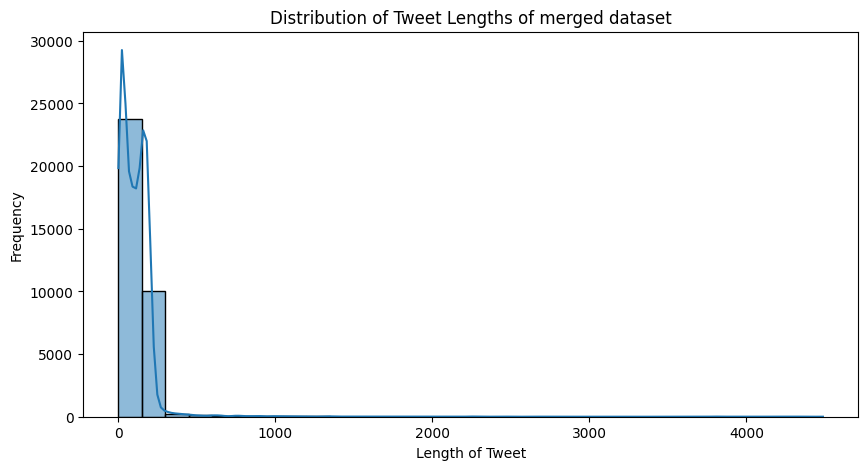

In [ ]:


merged_df['Tweet_Length'] = merged_df['Cleaned_Text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Tweet_Length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths of merged dataset")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.show()


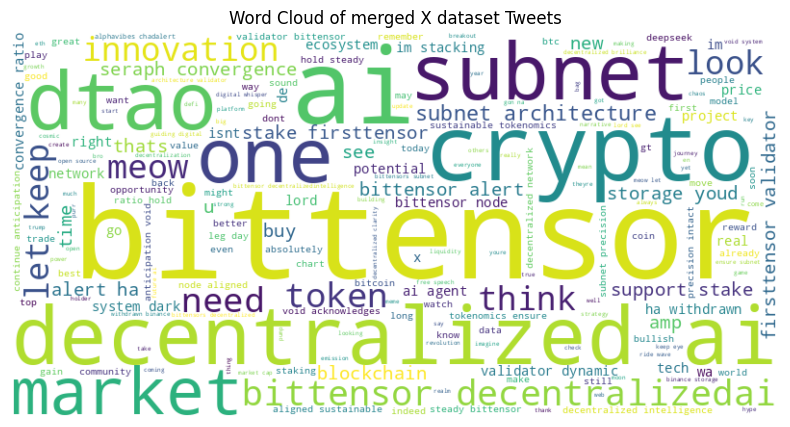

In [ ]:
from wordcloud import WordCloud

text = ' '.join(merged_df['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of merged X dataset Tweets")
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


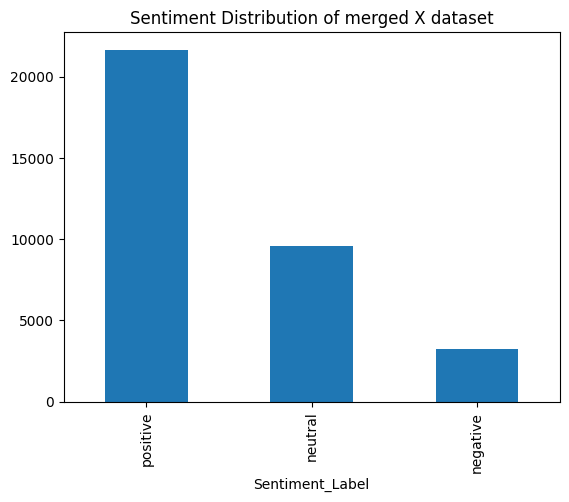

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
merged_df['Sentiment_Score'] = merged_df['Cleaned_Text'].apply(lambda x: sid.polarity_scores(x)['compound'])
merged_df['Sentiment_Label'] = merged_df['Sentiment_Score'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')
merged_df['Sentiment_Label'].value_counts().plot(kind='bar', title='Sentiment Distribution of merged X dataset')
plt.show()


In [ ]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [ ]:
from transformers import pipeline
import torch

# Use GPU if available
device = 0 if torch.cuda.is_available() else -1

# Load sentiment pipeline
sentiment_classifier = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    device=device
)

# Truncate text helper function
def truncate_text(text, max_words=100):
    tokens = text.split()
    return ' '.join(tokens[:max_words])

# Safe prediction wrapper
def get_sentiment(text):
    try:
        return sentiment_classifier(text)[0]['label']
    except:
        return 'NEUTRAL'  # fallback label

# --- Twitter dataset ---
twitter_df['cleaned_text'] = twitter_df['cleaned_text'].fillna('').astype(str)
twitter_df['short_text'] = twitter_df['cleaned_text'].apply(lambda x: truncate_text(x, max_words=100))
twitter_df['sentiment'] = twitter_df['short_text'].apply(get_sentiment)

# --- X/merged dataset ---
merged_df['Cleaned_Text'] = merged_df['Cleaned_Text'].fillna('').astype(str)
merged_df['short_text'] = merged_df['Cleaned_Text'].apply(lambda x: truncate_text(x, max_words=100))
merged_df['sentiment'] = merged_df['short_text'].apply(get_sentiment)

# Preview results
print(twitter_df[['short_text', 'sentiment']].head())
print(merged_df[['short_text', 'sentiment']].head())

# Save labeled datasets
twitter_df.to_csv("Final_Labeled_Twitter_Tweets.csv", index=False)
merged_df.to_csv("Final_Labeled_X_Tweets.csv", index=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


                                                short_text sentiment
1300000                            much chicken curry tell   LABEL_1
1300001  gareth chelsi evie dinner outside rose garden ...   LABEL_2
1300002                     thanks added delicious network   LABEL_2
1300003  wash wit baking soda mixed warm water work eve...   LABEL_1
1300004  also cruise email pic better quality like one ...   LABEL_2
                                          short_text sentiment
0  combine mass layoff security clearance revocat...   LABEL_1
1  go championship weekend section basketball wra...   LABEL_1
2  dear fix japan operation head supposed good fr...   LABEL_0
3  really interesting book called united state an...   LABEL_2
4  hey japanese people also facing attempt censor...   LABEL_0


In [43]:
twitter_df=pd.read_csv("Final_Labeled_Twitter_Tweets.csv")
merged_df=pd.read_csv("Final_Labeled_X_Tweets.csv")

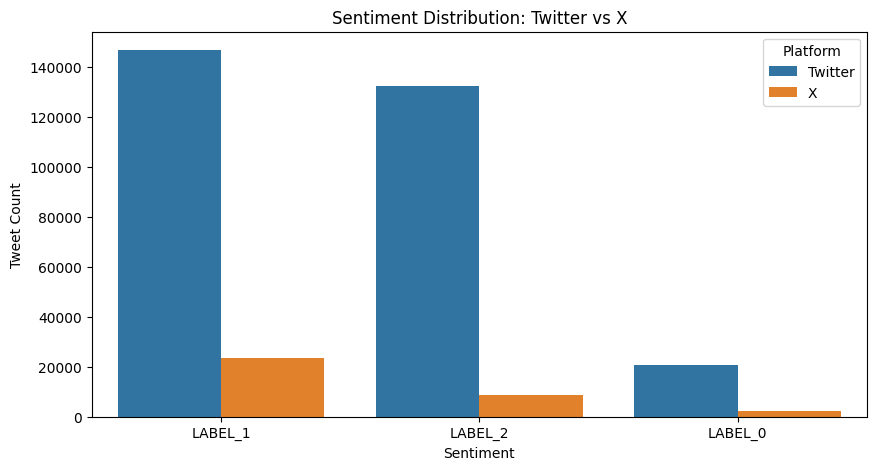

In [29]:
# Plot side-by-side sentiment comparison
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', hue='Platform', data=pd.concat([
    twitter_df.assign(Platform='Twitter'),
    merged_df.assign(Platform='X')
]))
plt.title("Sentiment Distribution: Twitter vs X")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

In [45]:
# For twitter_df
twitter_df['cleaned_text'] = twitter_df['cleaned_text'].fillna('').astype(str)

# For merged_df
merged_df['Cleaned_Text'] = merged_df['Cleaned_Text'].fillna('').astype(str)


In [14]:
moderation_keywords = [
    # Moderation & Restrictions
    "ban", "banned", "suspend", "suspended", "shadowban", "shadow banned", "account locked",
    "restricted", "rate limited", "deplatform", "muted", "post removed", "account flagged",
    "removed", "deleted", "violation", "restrict",
    "account locked", "blocked",

    # Free Speech & Censorship Discussion
    "freedom of speech", "free speech", "censorship", "silenced", "cancel culture",
    "narrative control", "content moderation", "fact check", "flagged tweet", "moderation bias",

    # Policy and Guidelines References
    "community guidelines", "terms of service", "policy violation", "violated guidelines",
    "platform rules", "automated moderation", "ai moderation", "trust and safety",

    # Suppression, Propaganda, Disinformation
    "suppression", "disinformation", "misinformation", "propaganda", "biased moderation",

    # Elon/Ownership-specific
    "elon musk", "elon changed twitter", "under elon", "new twitter policy",
    "twitter 2.0", "free speech absolutist", "elon said", "musk takeover",

    # Abuse, NSFW, Extremes
    "hate speech", "abusive", "harassment", "nfsw", "graphic content", "revenge porn",
    "nudity", "porn", "child safety", "self harm", "suicide", "terrorist content", "violent",
    "abuse","harassment","child porn", "child sex", "murder","kill","terrorist", "nude", "sex tape",
    "suicide","i want to die", "massacre", "rape", "isis", "jihad","slut","illegal",
]




# Function to detect moderation-related tweets
def detect_moderation(tweet):
    tweet = tweet.lower()
    return int(any(keyword in tweet for keyword in moderation_keywords))



# Apply function
twitter_df['moderation_related'] = twitter_df['cleaned_text'].apply(detect_moderation)
merged_df['moderation_related'] = merged_df['Cleaned_Text'].apply(detect_moderation)

# Check outputs
print("Twitter Moderation-related tweets sample:\n", twitter_df[['cleaned_text', 'moderation_related']].head(10))
print("\nX Moderation-related tweet samples:\n", merged_df[['cleaned_text', 'moderation_related']].head(10))

# Check counts
print("\nModeration-related tweet counts on Twitter dataset:", twitter_df['moderation_related'].sum())
print("Moderation-related tweet counts on X dataset:", merged_df['moderation_related'].sum())

Twitter Moderation-related tweets sample:
                                         cleaned_text  moderation_related
0                            much chicken curry tell                   0
1  gareth chelsi evie dinner outside rose garden ...                   0
2                     thanks added delicious network                   0
3  wash wit baking soda mixed warm water work eve...                   0
4  also cruise email pic better quality like one ...                   0
5                             ive sent emailgo check                   0
6     cant wait tomorrow either congrats feature yes                   0
7                                         lunch time                   0
8     slap palm forehead hah thought thanks link tho                   0
9        view outside bathroom windowi love mountain                   0

X Moderation-related tweet samples:
                                         cleaned_text  moderation_related
0  combine that with mass layoffs and secur

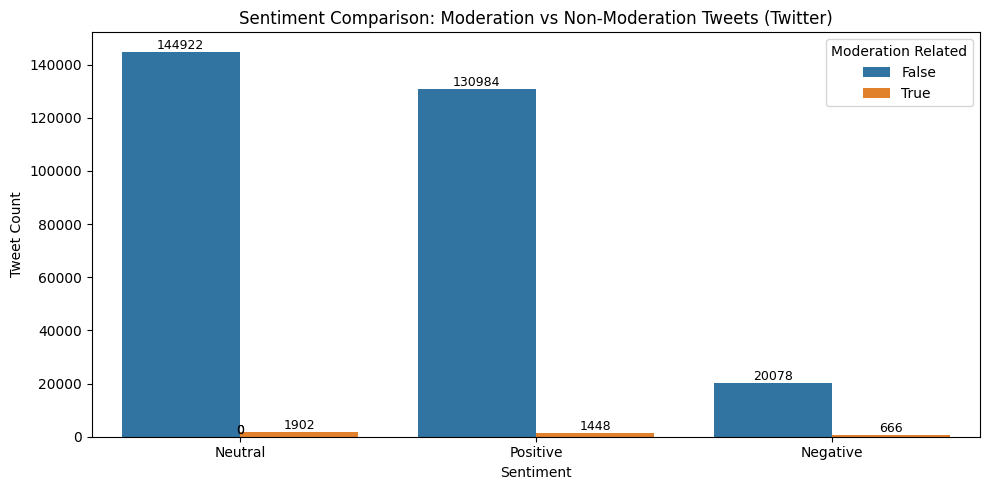

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='sentiment', hue='moderation_related', data=twitter_df)
plt.title("Sentiment Comparison: Moderation vs Non-Moderation Tweets (Twitter)")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.legend(title="Moderation Related")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


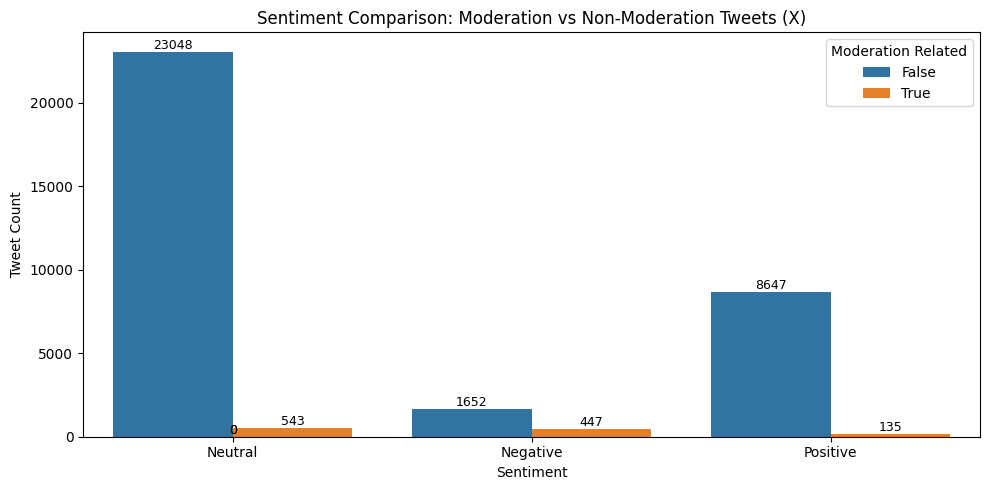

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='sentiment', hue='moderation_related', data=merged_df)
plt.title("Sentiment Comparison: Moderation vs Non-Moderation Tweets (X)")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.legend(title="Moderation Related")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


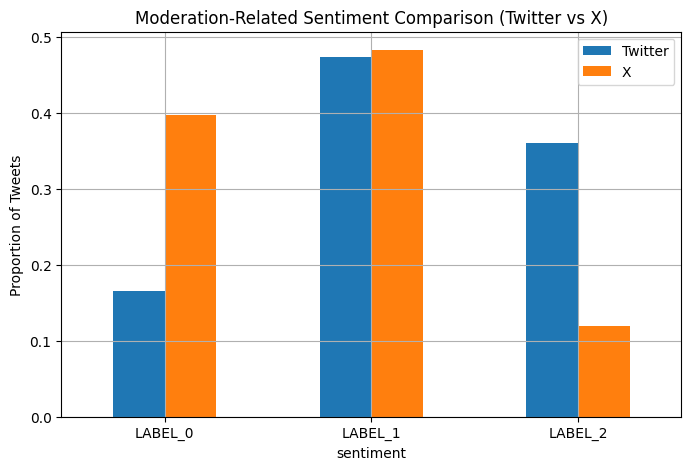

In [16]:
twitter_df['moderation_related'] = twitter_df['cleaned_text'].apply(lambda x: any(k in x.lower() for k in moderation_keywords))
merged_df['moderation_related'] = merged_df['Cleaned_Text'].apply(lambda x: any(k in x.lower() for k in moderation_keywords))

twitter_m = twitter_df[twitter_df['moderation_related']].copy()
merged_m = merged_df[merged_df['moderation_related']].copy()

# Compare sentiment
twitter_counts = twitter_m['sentiment'].value_counts(normalize=True)
merged_counts = merged_m['sentiment'].value_counts(normalize=True)

comparison_df = pd.DataFrame({
    'Twitter': twitter_counts,
    'X': merged_counts
}).fillna(0)

comparison_df.plot(kind='bar', figsize=(8,5), title="Moderation-Related Sentiment Comparison (Twitter vs X)")
plt.ylabel("Proportion of Tweets")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [17]:


from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer


mod_tweets_twitter = twitter_df[twitter_df['moderation_related'] == 1]['cleaned_text']
mod_tweets_x = merged_df[merged_df['moderation_related'] == 1]['cleaned_text']

# Print number of moderation tweets
print(f"Twitter moderation tweets count: {len(mod_tweets_twitter)}")
print(f"X moderation tweets count: {len(mod_tweets_x)}")

# defined models:
vectorizer = CountVectorizer(ngram_range=(1,2))

# Twitter dataset topic modeling
topic_model_twitter = BERTopic(vectorizer_model=vectorizer)
topics_twitter, _ = topic_model_twitter.fit_transform(mod_tweets_twitter)

# X dataset topic modeling
topic_model_x = BERTopic(vectorizer_model=vectorizer)
topics_x, _ = topic_model_x.fit_transform(mod_tweets_x)

# different topic models:
print("\nTwitter Moderation-Related Topics:")
print(topic_model_twitter.get_topic_info().head(10))

print("\nX Moderation-Related Topics:")
print(topic_model_x.get_topic_info().head(10))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Twitter Moderation-Related Topics:
   Topic  Count                                   Name  \
0     -1   1253                     -1_band_kill_wa_im   
1      0    305                0_husband_love_day_time   
2      1    226  1_banana_bread_banana bread_chocolate   
3      2    191      2_bank_bank account_account_money   
4      3    175               3_band_new_favorite_name   
5      4    125                 4_skill_skillz_mad_got   
6      5    124              5_kill_killing_lol_killed   
7      6    101         6_killer_watching_movie_killed   
8      7    100             7_porn_nude_porn star_star   
9      8     80          8_coffee_burbank_wedding_went   

                                      Representation  \
0  [band, kill, wa, im, like, good, love, killed,...   
1  [husband, love, day, time, future husband, hom...   
2  [banana, bread, banana bread, chocolate, eatin...   
3  [bank, bank account, account, money, transfer,...   
4  [band, new, favorite, name, know, love ban

In [23]:
# full text without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# print Twitter topics
print("\n🔹 Full Twitter Moderation-Related Topics:")
print(topic_model_twitter.get_topic_info().head(10))

# print X topics
print("\n🔹 Full X Moderation-Related Topics:")
print(topic_model_x.get_topic_info().head(10))



🔹 Full Twitter Moderation-Related Topics:
   Topic  Count                                   Name  \
0     -1   1253                     -1_band_kill_wa_im   
1      0    305                0_husband_love_day_time   
2      1    226  1_banana_bread_banana bread_chocolate   
3      2    191      2_bank_bank account_account_money   
4      3    175               3_band_new_favorite_name   
5      4    125                 4_skill_skillz_mad_got   
6      5    124              5_kill_killing_lol_killed   
7      6    101         6_killer_watching_movie_killed   
8      7    100             7_porn_nude_porn star_star   
9      8     80          8_coffee_burbank_wedding_went   

                                                                                  Representation  \
0                                  [band, kill, wa, im, like, good, love, killed, time, killing]   
1         [husband, love, day, time, future husband, home, love husband, best, daughter, future]   
2  [banana, bread,

In [50]:
!pip install wordcloud

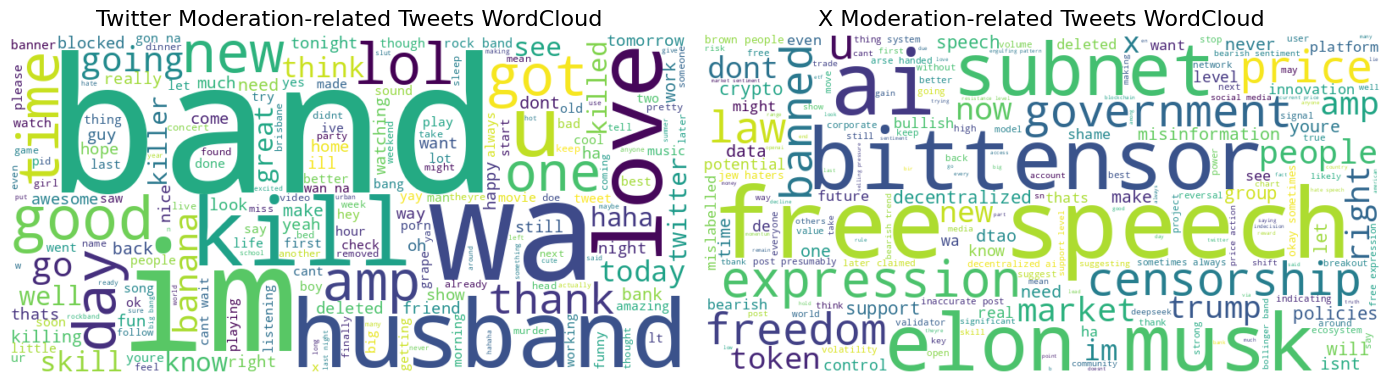

In [51]:
# Required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for Twitter Moderation-related tweets
twitter_topic_2 = ' '.join(twitter_df[twitter_df['moderation_related']==1]['cleaned_text'])
wordcloud_twitter = WordCloud(width=800, height=400, background_color='white').generate(twitter_topic_2)

# WordCloud for X Moderation-related tweets
x_topic_moderation = ' '.join(merged_df[merged_df['moderation_related']==1]['cleaned_text'])
wordcloud_x = WordCloud(width=800, height=400, background_color='white').generate(x_topic_moderation)

# Plot
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_twitter, interpolation='bilinear')
plt.title("Twitter Moderation-related Tweets WordCloud", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_x, interpolation='bilinear')
plt.title("X Moderation-related Tweets WordCloud", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [52]:

label_mapping = {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}


twitter_df['sentiment'] = twitter_df['sentiment'].replace({
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
})


merged_df['sentiment'] = merged_df['sentiment'].replace({
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
})


print("Twitter sentiment clearly labeled:\n", twitter_df['sentiment'].value_counts())
print("\nX sentiment clearly labeled:\n", merged_df['sentiment'].value_counts())


Twitter sentiment clearly labeled:
 sentiment
Neutral     146824
Positive    132432
Negative     20744
Name: count, dtype: int64

X sentiment clearly labeled:
 sentiment
Neutral     23591
Positive     8782
Negative     2099
Name: count, dtype: int64


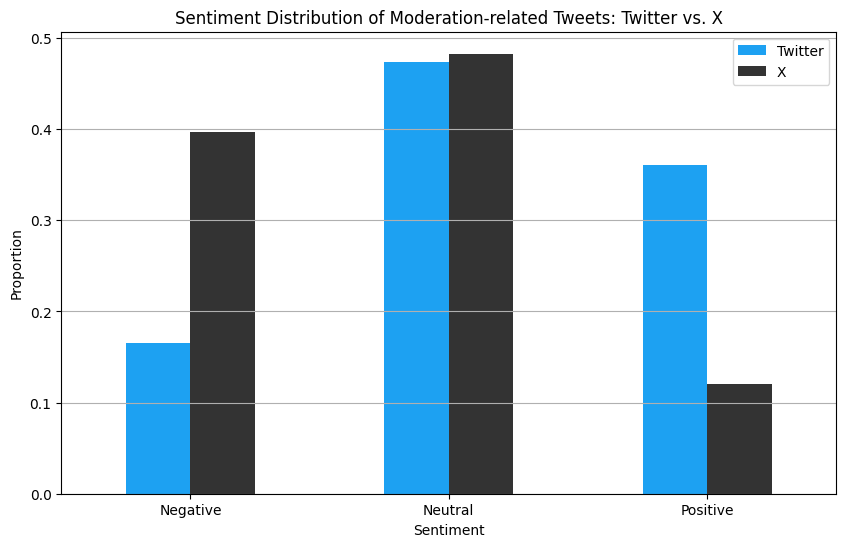

In [54]:
# Sentiment Distribution
import matplotlib.pyplot as plt
import pandas as pd

sentiment_counts_twitter = twitter_df[twitter_df['moderation_related']==1]['sentiment'].value_counts(normalize=True)
sentiment_counts_x = merged_df[merged_df['moderation_related']==1]['sentiment'].value_counts(normalize=True)

# DataFrame for visualization
sentiment_df = pd.DataFrame({'Twitter': sentiment_counts_twitter, 'X': sentiment_counts_x}).fillna(0)

# sentiment distributions
sentiment_df.plot(kind='bar', figsize=(10,6), color=['#1DA1F2', '#333333'])
plt.title('Sentiment Distribution of Moderation-related Tweets: Twitter vs. X')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [55]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
sentiment_contingency = pd.DataFrame({
    'Twitter': twitter_df[twitter_df['moderation_related']==1]['sentiment'].value_counts(),
    'X': merged_df[merged_df['moderation_related']==1]['sentiment'].value_counts()
}).fillna(0)

# Perform Chi-Square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(sentiment_df)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.5f}")

if p < 0.05:
    print("Statistically significant difference in sentiment distribution between Twitter and X.")
else:
    print("No statistically significant difference in sentiment distribution.")

print("\nSentiment frequency clearly:\n", sentiment_df)


Chi-square test results:
Chi-square statistic: 0.216
p-value: 0.89778
No statistically significant difference in sentiment distribution.

Sentiment frequency clearly:
             Twitter         X
sentiment                    
Negative   0.165837  0.397333
Neutral    0.473606  0.482667
Positive   0.360558  0.120000
